In [23]:
# Answer 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

airlines = pd.read_csv("Airline.csv")
airlines.head()


,City1,City2,Avg_Fare,Dist,Avg_week_pass,market_lead_airline,market_share,avg_fare,low_price_airline,market_share_1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [20]:
# Answer 2
new_airlines=airlines.loc[:, ['Avg_Fare','Dist','Avg_week_pass','market_share','avg_fare','market_share_1','price']]
from scipy import stats
new_airlines[(np.abs(stats.zscore(new_airlines)) < 3).all(axis=1)]


(1000, 7)

In [26]:
# Answer 3
y=airlines.Avg_Fare
x=airlines.drop('Avg_Fare',axis=1)
y.head()
x.head()

,City1,City2,Dist,Avg_week_pass,market_lead_airline,market_share,avg_fare,low_price_airline,market_share_1,price
0,CAK,ATL,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [29]:
# Answer 4
airlines.corr()
new_data=airlines.drop(['Avg_week_pass','market_share','market_share_1'], axis=1, inplace=True)

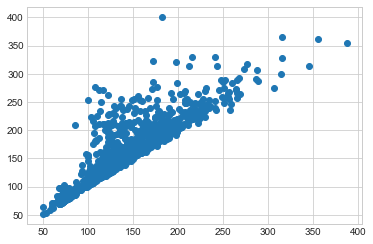

In [35]:
# Answer 5
import matplotlib.pyplot as plot
import numpy as np
y=new_airlines.Avg_Fare
x1=new_airlines.Dist
x2=new_airlines.Avg_week_pass
x3=new_airlines.market_share
x4=new_airlines.market_share_1
x5=new_airlines.price
plot.scatter(x5, y)




In [39]:
# Answer 6
import pandas as pd
airlines_with_dummies = pd.get_dummies(airlines, prefix='Category_', columns=['City1','City2','market_lead_airline','low_price_airline'])
airlines_with_dummies.head()


,Avg_Fare,Dist,avg_fare,price,Category__ABQ,Category__ACY,Category__ALB,Category__AMA,Category__ATL,Category__AUS,...,Category__G4,Category__HP,Category__NK,Category__NW,Category__SY,Category__TZ,Category__UA,Category__US,Category__WN,Category__YX
0,114.47,528,111.03,111.03,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,123.09,118.94,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,223.98,167.12,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,68.86,68.86,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,161.36,145.42,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
y=airlines_with_dummies.Avg_Fare
x=airlines_with_dummies.drop('Avg_Fare',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()
x_test.head()

,Dist,avg_fare,price,Category__ABQ,Category__ACY,Category__ALB,Category__AMA,Category__ATL,Category__AUS,Category__BDL,...,Category__G4,Category__HP,Category__NK,Category__NW,Category__SY,Category__TZ,Category__UA,Category__US,Category__WN,Category__YX
813,495,117.19,114.77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,723,161.36,145.42,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
115,1161,167.75,167.75,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
302,1680,166.93,166.93,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
839,2454,333.12,273.63,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:
import sklearn.metrics 
from sklearn.linear_model import LinearRegression 
reg_model = LinearRegression() 
reg_model.fit(x_train, y_train)






LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
# Answer 7
print('Intercept :', reg_model.intercept_[0], '\n') 
print(pd.DataFrame({'features':x_train.columns,'coeficients':reg_model.coef_[0]})) 